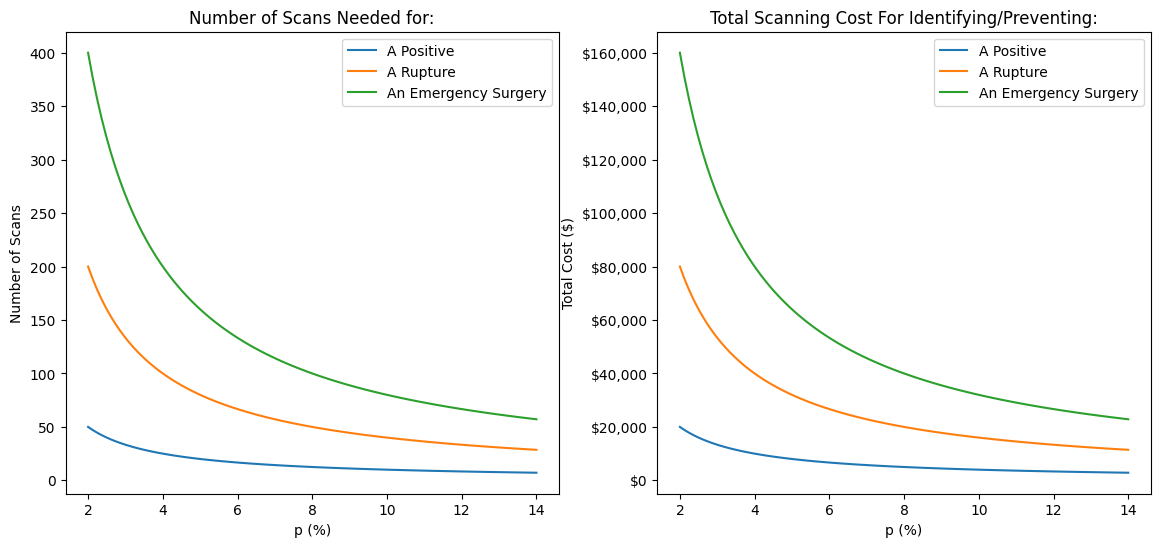

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def scans2find(r=0.25, s=0.50, scancost=400):
    """
    Calculates the scans needed to perform before you identify one positive diagnosis, one rupture, or one emergency surgery
    e.g. if 20% of scans are positive, then need to scan 5 people for one positive. if 25% of these rupture, then you
    need to scan 1/(.2*.25) = 20 people encounter a person with AAA that will rupture. if only half these people survive
    long enough to receive emergency surgery, then you need to scan 40 people before you would encounter the procedure
    """
    # Function to format y-axis as dollars
    def dollars(x, pos):
        return f'${x:,.0f}'

    p_values = np.linspace(0.02, 0.14, 100) #positivity rate

    n_positv = 1 / p_values
    n_ruptur = 1 / (p_values * r)
    n_emergs = 1 / (p_values * r * s)

    c_positv = n_positv * scancost
    c_ruptur = n_ruptur * scancost
    c_emergs = n_emergs * scancost

    # Plot for quantities (n_positiv, n_ruptur, n_emergs)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

    ax1.plot(p_values * 100, n_positv, label='A Positive')
    ax1.plot(p_values * 100, n_ruptur, label='A Rupture')
    ax1.plot(p_values * 100, n_emergs, label='An Emergency Surgery')
    ax1.set_xlabel('p (%)')
    ax1.set_ylabel('Number of Scans')
    ax1.set_title('Number of Scans Needed for:')
    ax1.legend()

    ax2.plot(p_values * 100, c_positv, label='A Positive')
    ax2.plot(p_values * 100, c_ruptur, label='A Rupture')
    ax2.plot(p_values * 100, c_emergs, label='An Emergency Surgery')
    #plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(dollars))
    ax2.yaxis.set_major_formatter(mticker.FuncFormatter(dollars))
    ax2.set_xlabel('p (%)')
    ax2.set_ylabel('Total Cost ($)')
    ax2.set_title('Total Scanning Cost For Identifying/Preventing:')
    ax2.legend()

scans2find()